In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [76]:
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
tr=pd.read_csv('/kaggle/input/titanic/train.csv')
train=tr.copy()

In [78]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

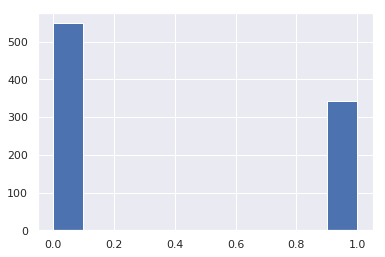

In [79]:
plt.hist(train['Survived'])

In [80]:
train[train.isna().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
print(np.unique(train['Age']))

[ 0.42  0.67  0.75  0.83  0.92  1.    2.    3.    4.    5.    6.    7.
  8.    9.   10.   11.   12.   13.   14.   14.5  15.   16.   17.   18.
 19.   20.   20.5  21.   22.   23.   23.5  24.   24.5  25.   26.   27.
 28.   28.5  29.   30.   30.5  31.   32.   32.5  33.   34.   34.5  35.
 36.   36.5  37.   38.   39.   40.   40.5  41.   42.   43.   44.   45.
 45.5  46.   47.   48.   49.   50.   51.   52.   53.   54.   55.   55.5
 56.   57.   58.   59.   60.   61.   62.   63.   64.   65.   66.   70.
 70.5  71.   74.   80.     nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan
   nan   nan   nan   nan   nan   nan   nan   nan   nan   nan   n

In [83]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

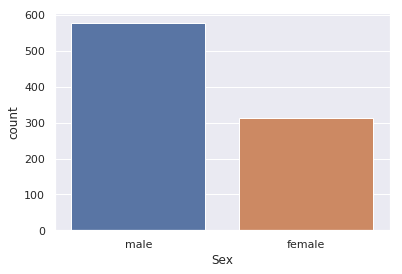

In [84]:
import seaborn as sns
sns.countplot(x='Sex',data=train);

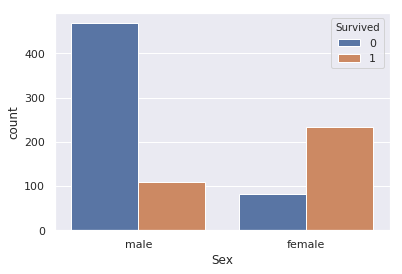

In [85]:
sns.countplot(x='Sex',data=train,hue="Survived");

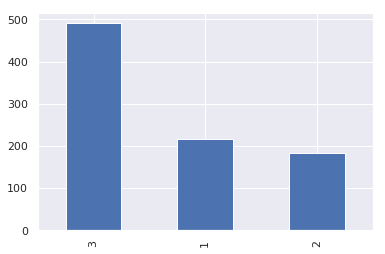

In [86]:
train['Pclass'].value_counts().plot.bar()



In [87]:
pd.crosstab(index=train['Sex'],columns=train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


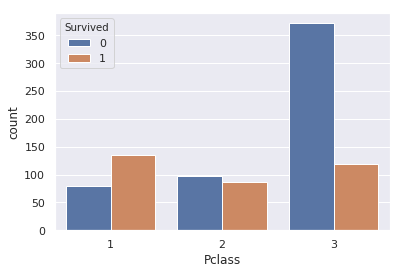

In [88]:
sns.countplot(x='Pclass',data=train,hue="Survived");

In [89]:
pd.crosstab(index=train['Pclass'],columns=train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [90]:
pd.crosstab(index=train['Survived'],columns=train['Pclass'],margins='True').style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [91]:
#column wise normalize
pd.crosstab(index=train['Survived'],columns=train['Pclass'],normalize='columns',margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Survived,,,,
0,0.37037,0.527174,0.757637,0.616162
1,0.62963,0.472826,0.242363,0.383838


In [92]:
#row-wise normalize
pd.crosstab(index=train['Survived'],columns=train['Pclass'],normalize='index',margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953
All,0.242424,0.20651,0.551066


In [93]:
#non normalized sex,survived vs class relation
pd.crosstab(index=[train['Sex'],train['Survived']],columns=train['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

In [94]:
pd.crosstab(index=[train['Sex'],train['Survived']],columns=train['Pclass'],normalize='columns',margins=True).style.background_gradient(cmap='summer_r')

In [95]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [96]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


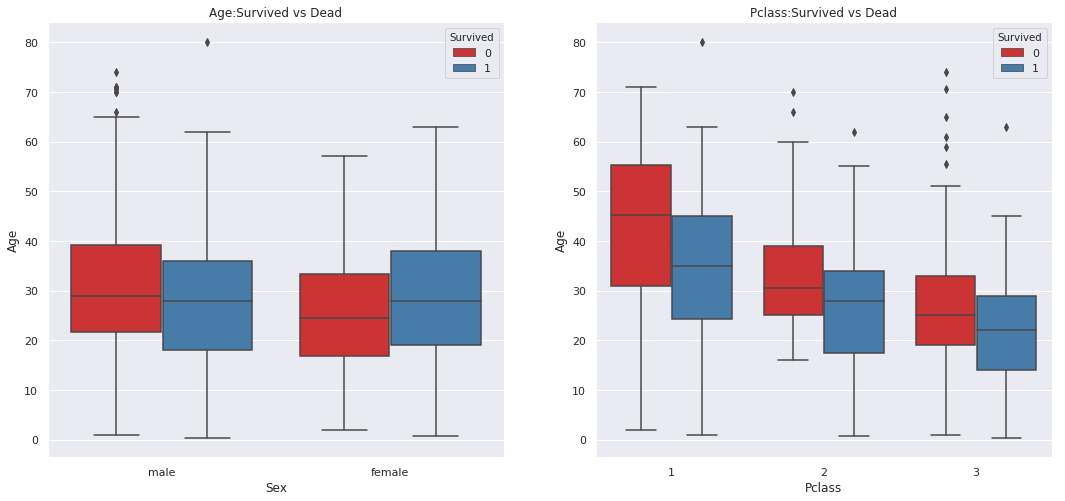

In [97]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.boxplot(x='Sex',y='Age',data=train,hue='Survived',ax=ax[0],palette='Set1')
ax[0].set_title('Age:Survived vs Dead')
sns.boxplot(x='Pclass',y='Age',data=train,hue='Survived',ax=ax[1],palette='Set1')
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()



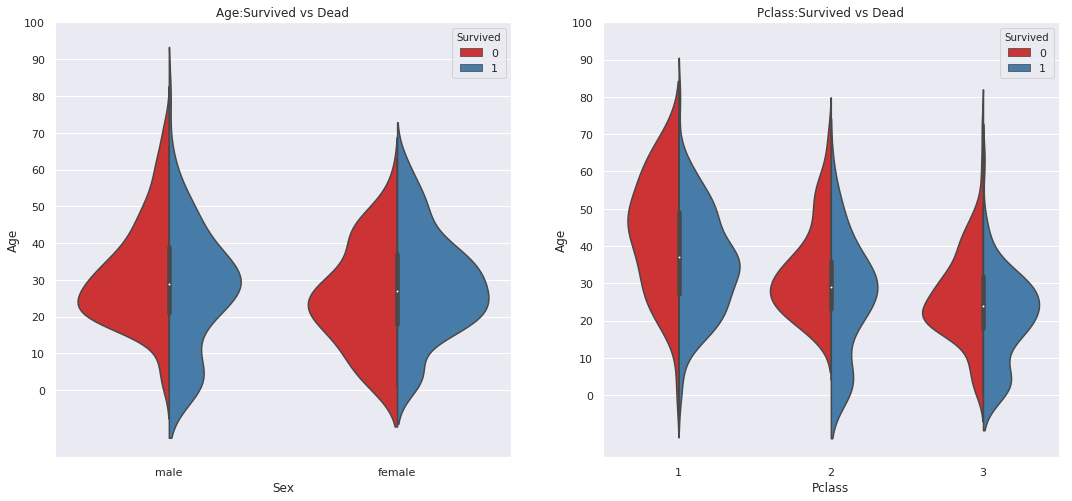

In [98]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.set(style='darkgrid')
sns.violinplot(x='Sex',y='Age',data=train,hue='Survived',ax=ax[0],split=True,legend=True,palette='Set1')
ax[0].set_yticks(range(0,110,10))
ax[0].set_title('Age:Survived vs Dead')
sns.violinplot(x='Pclass',y='Age',data=train,hue='Survived',ax=ax[1],split=True,legend=True,palette='Set1')
ax[1].set_yticks(range(0,110,10))
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()



In [99]:
#cant use countplot for grouped plot
#sns.countplot(x='Sex',y='Age',hue='Survived',data=train)

In [100]:
#Value_counts used for categorical values
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [101]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [102]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [103]:
#create new dataframe child n adult
adult=train[train['Age']>18]
child=train[train['Age']<18]

In [104]:
#adult survived
pd.crosstab(index=adult['Sex'],columns=adult['Survived'],normalize='index',margins=True)

Survived,0,1
Sex,,
female,0.217617,0.782383
male,0.819372,0.180628
All,0.617391,0.382609


In [105]:
#child survived
pd.crosstab(index=child['Sex'],columns=child['Survived'],normalize='index',margins=True)

Survived,0,1
Sex,,
female,0.309091,0.690909
male,0.603448,0.396552
All,0.460177,0.539823


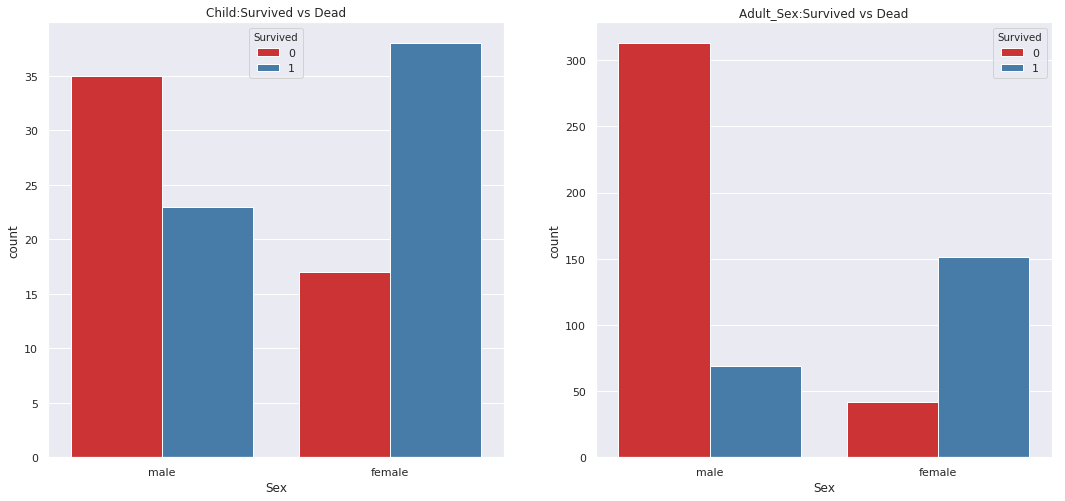

In [106]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Sex',hue='Survived',data=child,ax=ax[0],palette='Set1')
ax[0].set_title('Child:Survived vs Dead')
sns.countplot('Sex',hue='Survived',data=adult,ax=ax[1],palette='Set1')
ax[1].set_title('Adult_Sex:Survived vs Dead')
plt.show()


In [107]:
#age Nan to be filled but many variations in age.Kid cant have age of 29,use Initial of name instead to set different averages
train['Initial']=0
train['Initial']=train["Name"].str.extract('([A-Za-z]+)\.')

In [108]:
pd.crosstab(index=train['Sex'],columns=train['Initial']).style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [109]:
pd.crosstab(index=[train['Sex'],train['Age']],columns=train['Initial']).T.style.background_gradient(cmap='summer_r')

In [110]:
#misspelled are replaced
train['Initial'].replace(['Col','Capt','Countess','Don','Dr','Jonkheer','Lady','Major','Mlle','Mme','Ms','Rev','Sir'],
                         ['Mr','Mr','Mrs','Mr','Mr','Mrs','Miss','Mr','Mrs','Mrs','Miss','Mr','Mr'],inplace=True)

In [111]:
pd.crosstab(index=train['Sex'],columns=train['Initial']).style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs
Sex,,,,
female,0,184,1,129
male,40,0,536,1


In [112]:
train.groupby('Initial')

In [113]:
train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Initial,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,409.880435,0.701087,2.298913,21.993243,0.711957,0.543478,43.607678
Mr,457.016760,0.162011,2.372439,33.010791,0.290503,0.150838,24.888437
Mrs,461.161538,0.792308,1.961538,35.575221,0.669231,0.800000,45.514775


In [114]:
train.groupby('Initial').mean()['Age']

Initial
Master     4.574167
Miss      21.993243
Mr        33.010791
Mrs       35.575221
Name: Age, dtype: float64

In [115]:
train.loc[(train['Age'].isnull())&(train['Initial']=='Mr'),'Age']=33
train.loc[(train['Age'].isnull())&(train['Initial']=='Mrs'),'Age']=36
train.loc[(train['Age'].isnull())&(train['Initial']=='Master'),'Age']=5
train.loc[(train['Age'].isnull())&(train['Initial']=='Miss'),'Age']=22

In [116]:
train['Age'].isnull().any()
#train['Age'].isnull().sum()

False

In [117]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
#plt.hist(x='Age',data=(train[train['Survived']==0]),ax=ax[0],palette='Set1')
#ax[0].set_title('Age:Survived vs Dead')
#sns.boxplot(x='Pclass',y='Age',data=train,hue='Survived',ax=ax[1],palette='Set1')
#ax[1].set_title('Pclass:Survived vs Dead')
#plt.show()



In [118]:
pd.crosstab(index=[train['Sex'],train['Survived']],columns=[train['Embarked'],train['Pclass']],normalize='index').T.style.background_gradient(cmap='summer_r')


In [119]:
pd.crosstab(index=[train['Sex'],train['Survived']],columns=[train['Embarked'],train['Pclass']]).T.style.background_gradient(cmap='summer_r')


In [120]:
pd.crosstab(index=train['Embarked'],columns=train['Survived'],margins=True).T.style.background_gradient(cmap='summer_r')


Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


In [121]:
pd.crosstab(index=train['Embarked'],columns=train['Pclass'],margins=True).T.style.background_gradient(cmap='summer_r')


Embarked,C,Q,S,All
Pclass,,,,
1,85,2,127,214
2,17,3,164,184
3,66,72,353,491
All,168,77,644,889


In [122]:
pd.crosstab(columns=[train['Embarked'],train['Pclass']],index=train['Survived'],margins=True).T.style.background_gradient(cmap='summer_r')


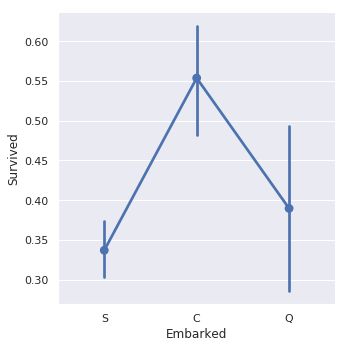

In [123]:
sns.factorplot('Embarked','Survived',data=train)

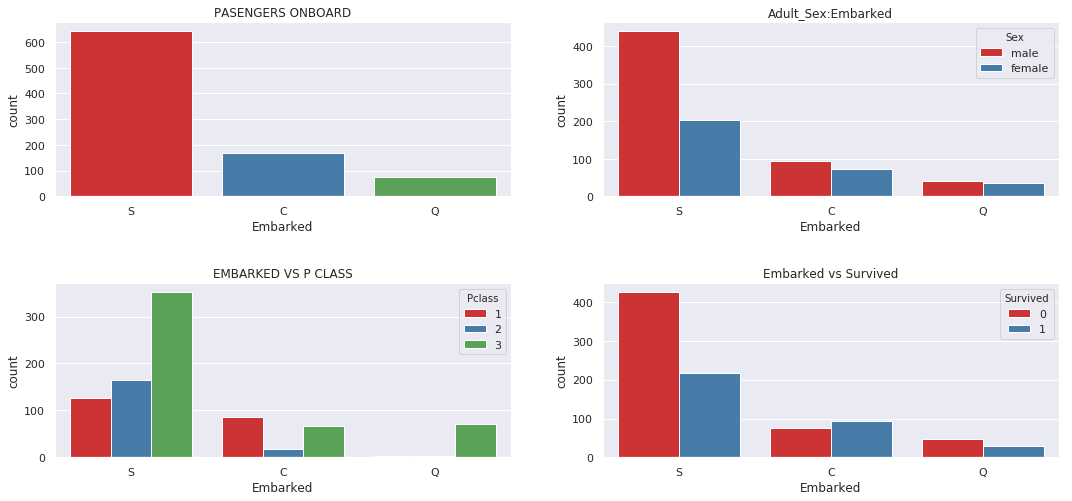

In [124]:
f,ax=plt.subplots(2,2,figsize=(18,8))
sns.countplot('Embarked',data=train,ax=ax[0,0],palette='Set1')
ax[0,0].set_title('PASENGERS ONBOARD')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1],palette='Set1')
ax[0,1].set_title('Adult_Sex:Embarked')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,0],palette='Set1')
ax[1,0].set_title('EMBARKED VS P CLASS')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,1],palette='Set1')
ax[1,1].set_title('Embarked vs Survived')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

plt.show()


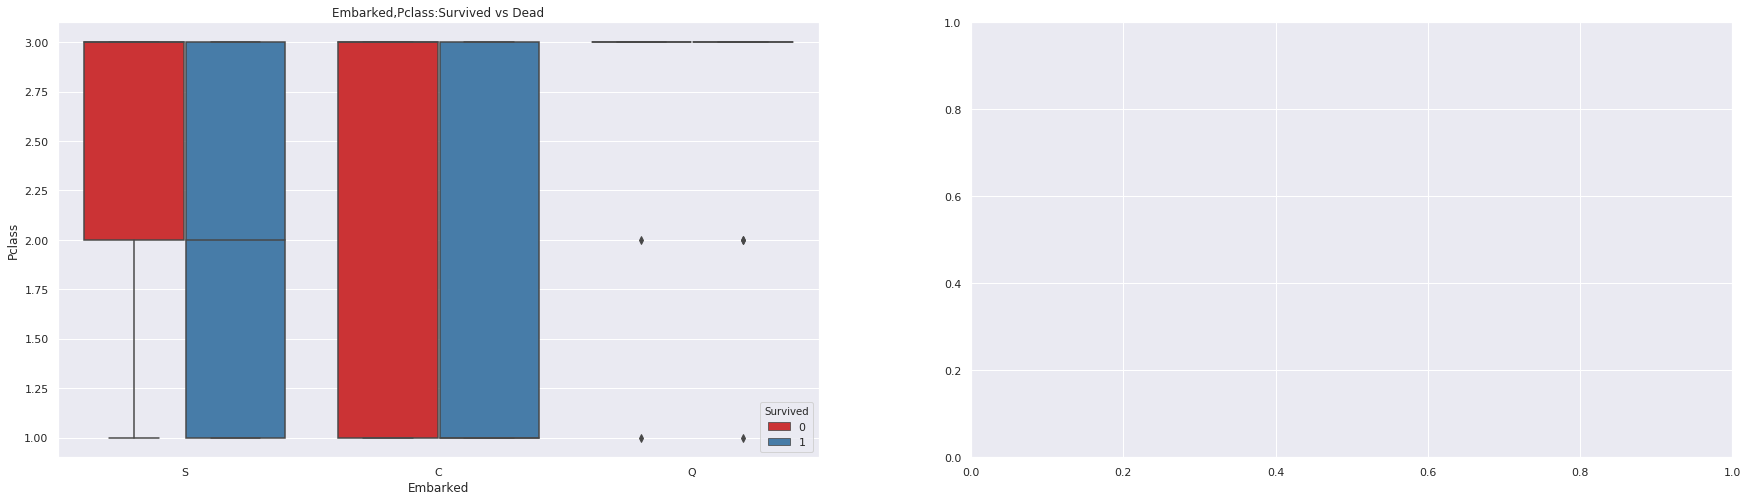

In [125]:
f,ax=plt.subplots(1,2,figsize=(30,8))
sns.boxplot(x='Embarked',y='Pclass',data=train,hue='Survived',ax=ax[0],palette='Set1')
ax[0].set_title('Embarked,Pclass:Survived vs Dead')
plt.show()


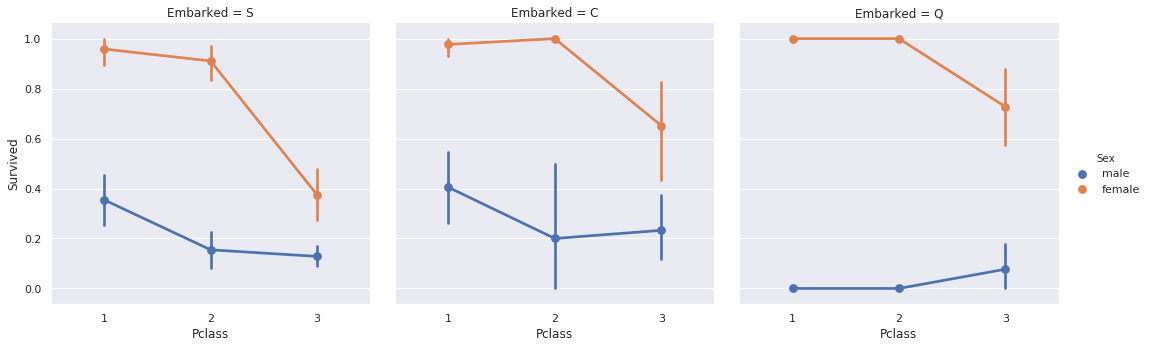

In [126]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train)
plt.show()


In [127]:
train['Embarked'].fillna('S',inplace=True)

In [128]:
train['Embarked'].isnull().any()

False

In [129]:
pd.crosstab(columns=train['SibSp'],index=train['Survived'],margins=True).T.style.background_gradient(cmap='summer_r')


Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [130]:
pd.crosstab(columns=train['SibSp'],index=train['Sex'],margins=True).T.style.background_gradient(cmap='summer_r')


Sex,female,male,All
SibSp,,,
0,174,434,608
1,106,103,209
2,13,15,28
3,11,5,16
4,6,12,18
5,1,4,5
8,3,4,7
All,314,577,891


In [131]:
pd.crosstab(columns=train['SibSp'],index=train['Pclass'],margins=True).T.style.background_gradient(cmap='summer_r')


Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


In [132]:
pd.crosstab(index=[train['SibSp'],train['Sex']],columns=train['Survived'],margins=True).T.style.background_gradient(cmap='summer_r')


In [133]:
pd.crosstab(columns=[train['Survived'],train['Pclass']],index=train['SibSp'],margins=True).T.style.background_gradient(cmap='summer_r')


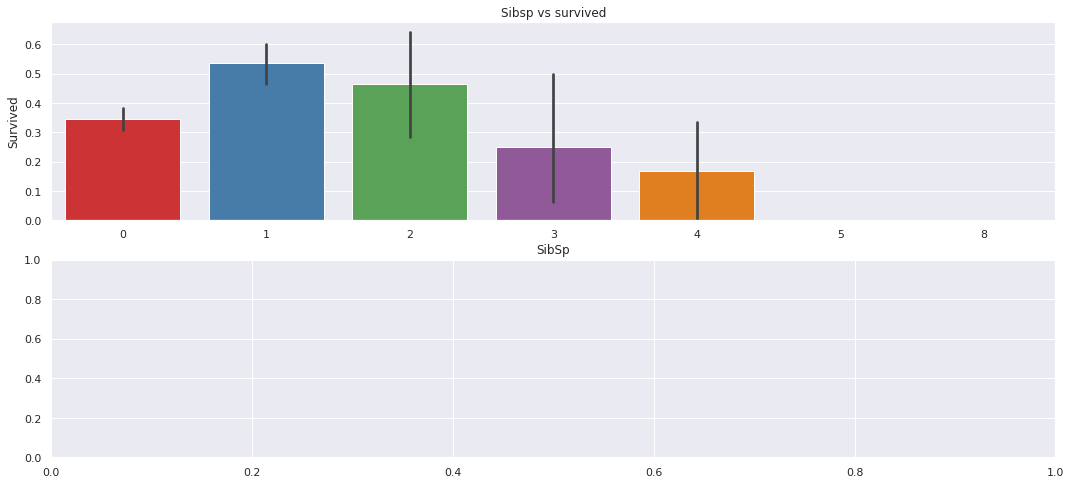

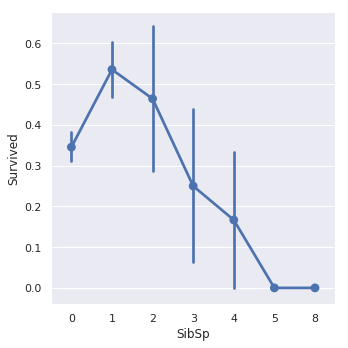

In [134]:
f,ax=plt.subplots(2,1,figsize=(18,8))
sns.barplot('SibSp','Survived',data=train,ax=ax[0],palette='Set1')
ax[0].set_title('Sibsp vs survived')
sns.factorplot('SibSp','Survived',data=train,ax=ax[0])
ax[0].set_title('Sibsp vs survived')
plt.show()


In [135]:
pd.crosstab(columns=[train['Survived'],train['Pclass']],index=train['Parch'],margins=True).T.style.background_gradient(cmap='summer_r')


In [136]:
pd.crosstab(columns=train['Survived'],index=train['Parch'],margins=True).T.style.background_gradient(cmap='summer_r')


Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


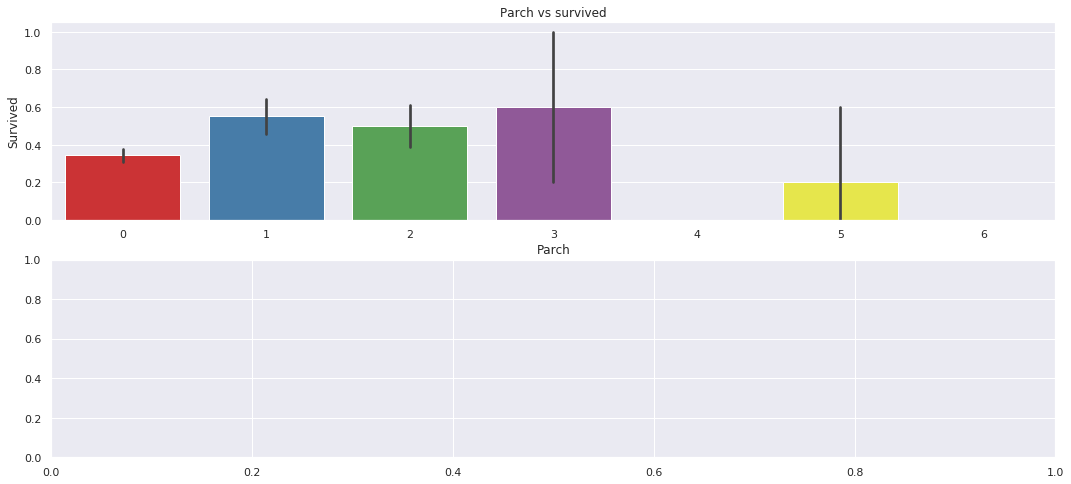

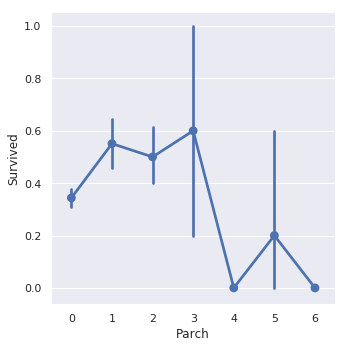

In [137]:
f,ax=plt.subplots(2,1,figsize=(18,8))
sns.barplot('Parch','Survived',data=train,ax=ax[0],palette='Set1')
ax[0].set_title('Parch vs survived')
sns.factorplot('Parch','Survived',data=train,ax=ax[0])
ax[0].set_title('Parch vs survived')
plt.show()


In [138]:
print('Max fare',train['Fare'].max())
print('Min fare',train['Fare'].min())
print('aVG fare',train['Fare'].mean())

Max fare 512.3292
Min fare 0.0
aVG fare 32.2042079685746


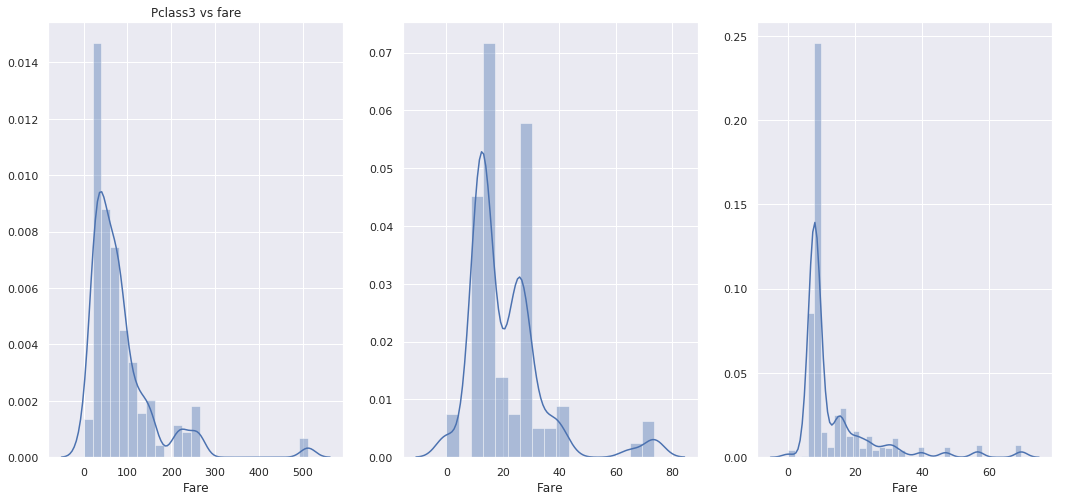

In [139]:
f,ax=plt.subplots(1,3,figsize=(18,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Pclass1 vs fare')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[0].set_title('Pclass2 vs fare')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[0].set_title('Pclass3 vs fare')

plt.show()


In [140]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.041709,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.091497,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339582,0.083081,0.018443,-0.549500
Age,0.041709,-0.091497,-0.339582,1.000000,-0.267734,-0.198712,0.089087
SibSp,-0.057527,-0.035322,0.083081,-0.267734,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.198712,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.089087,0.159651,0.216225,1.000000


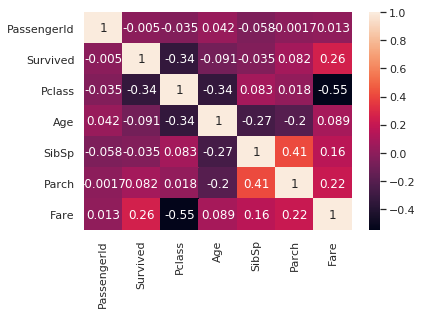

In [141]:
sns.heatmap(train.corr(),annot=True)

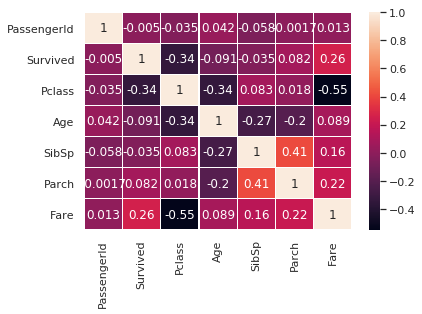

In [142]:
sns.heatmap(train.corr(),annot=True,linewidths=0.2) 

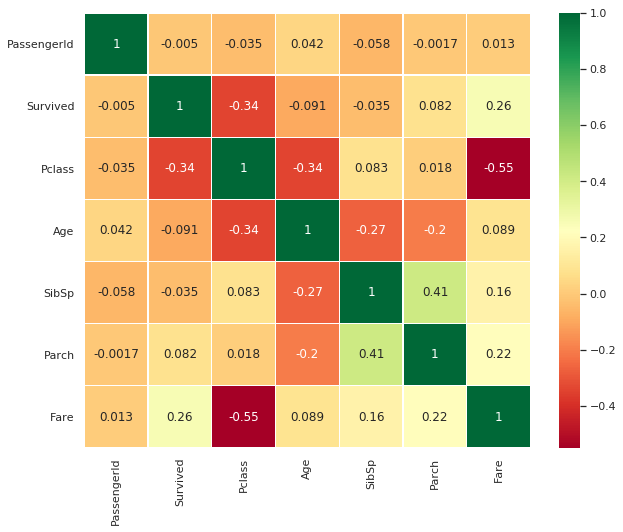

In [143]:
#data.corr()-->correlation matrix
sns.heatmap(train.corr(),annot=True,linewidths=0.2,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()


In [144]:
#only numeric are plotted in corr matrix;string not possible in corr. matrix


In [145]:
#cont. to categorical using binning/normalisation ;AGE IS cont.